In [1]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

C:\Users\gg\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 此函數會幫我們把多張影像畫成一張多宮格圖
def img_combine(img, ncols=8, size=1, path=False):
    from math import ceil
    import matplotlib.pyplot as plt
    import numpy as np
    nimg = len(img)
    nrows = int(ceil(nimg/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(ncols*size,nrows*size))
    if nrows == 0:
        return
    elif ncols == 1:
        for r, ax in zip(np.arange(nrows), axes):
            nth=r
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                
            ax.set_axis_off()
    elif nrows == 1:
        for c, ax in zip(np.arange(ncols), axes):
            nth=c
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
            ax.set_axis_off()
    else:
        for r, row in zip(np.arange(nrows), axes):
            for c, ax in zip(np.arange(ncols), row):
                nth=r*ncols+c
                if nth < nimg:
                    ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                ax.set_axis_off()
    plt.show()

In [3]:
# 讀取 Cifar-10 資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [19]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

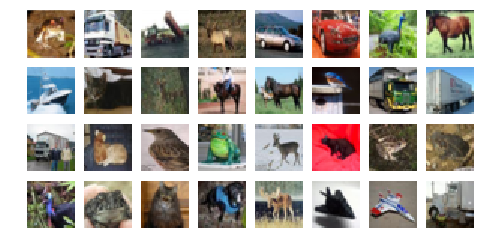

In [4]:
# 取前 32 張圖片做視覺化
images = x_train[:32]
img_combine(images)

In [5]:
# 建立 ImageDataGenerator，並指定我們要做資料增強的數值範圍
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)


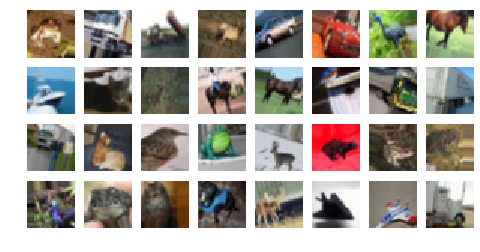

In [6]:
# 注意！！ ImageDataGenerator 是一個 Generator (生成器)! 對 Generator 不熟悉的同學請回到 Day098 做複習。
# 使用 .flow 後，就會對我們的影像進行增強，再 call next 取出 generator 的圖像。(shuffle=False 因為我們希望圖像的順序不要改變，方便觀察。實際訓練時預設是 shuffle=True) 
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int")) # 注意在訓練時神經網路時，圖像資料必須要是 float32，但在做視覺化時要轉為 int 才能順利畫圖。所以為了畫圖才把資料轉為 int

In [13]:
next(data_generator.flow(images, shuffle=False)).shape

(32, 32, 32, 3)

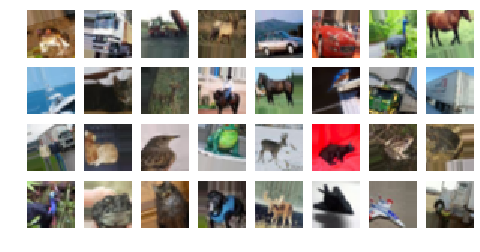

In [8]:
# 因為隨機性的關係，所以一樣的圖像再經過一次 generator 後的結果不一定相同
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

## 作業

請使用 ImageDataGenerator 來進行 Cifar-10 資料集的訓練，並觀察不同的圖像增強方法是否會顯著影響訓練結果

In [11]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

batch_size = 16
num_classes = 10
epochs = 10

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

 #Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

model = Sequential()
model.add(Conv2D(64, (5, 4), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Dense(22))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 16s 310us/step - loss: 1.9101 - acc: 0.3344 - val_loss: 1.6242 - val_acc: 0.4386
Epoch 2/100
50000/50000 [==============================] - 6s 121us/step - loss: 1.6435 - acc: 0.4254 - val_loss: 1.5321 - val_acc: 0.4580
Epoch 3/100
50000/50000 [==============================] - 6s 122us/step - loss: 1.5463 - acc: 0.4593 - val_loss: 1.4647 - val_acc: 0.4909
Epoch 4/100
50000/50000 [==============================] - 6s 121us/step - loss: 1.4864 - acc: 0.4795 - val_loss: 1.4352 - val_acc: 0.4974
Epoch 5/100
50000/50000 [==============================] - 6s 121us/step - loss: 1.4344 - acc: 0.4967 - val_loss: 1.3985 - val_acc: 0.5088
Epoch 6/100
50000/50000 [==============================] - 6s 121us/step - loss: 1.3759 - acc: 0.5202 - val_loss: 1.3852 - val_acc: 0.5187
Epoch 7/100
50000/50000 [==============================] - 6s 121us/step - loss: 1.3243 - acc: 0.5361 - val_loss: 1

50000/50000 [==============================] - 6s 122us/step - loss: 0.3424 - acc: 0.8861 - val_loss: 2.9047 - val_acc: 0.5041
Epoch 60/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.3401 - acc: 0.8886 - val_loss: 2.8497 - val_acc: 0.5019
Epoch 61/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.3301 - acc: 0.8905 - val_loss: 2.7055 - val_acc: 0.5008
Epoch 62/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.3302 - acc: 0.8906 - val_loss: 2.6780 - val_acc: 0.5017
Epoch 63/100
50000/50000 [==============================] - 6s 121us/step - loss: 0.3145 - acc: 0.8942 - val_loss: 3.0614 - val_acc: 0.5020
Epoch 64/100
50000/50000 [==============================] - 6s 121us/step - loss: 0.3299 - acc: 0.8912 - val_loss: 3.0135 - val_acc: 0.5077
Epoch 65/100
50000/50000 [==============================] - 6s 121us/step - loss: 0.3236 - acc: 0.8936 - val_loss: 2.8947 - val_acc: 0.5008
Epoch 66/100
50000/50000 [=======

In [21]:
def cifar_generator(image_array, batch_size=32):
    while True:
        for indexs in range(0, len(image_array), batch_size):
            images = data_generator.flow(x_train[indexs: indexs+batch_size])
            labels = y_train[indexs: indexs+batch_size]
            yield images, labels

In [24]:
model1 = Sequential()
model1.add(Conv2D(64, (5, 4), padding='same',
                 input_shape=x_train.shape[1:]))
model1.add(Dense(22))
model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

model1.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model1.fit_generator(cifar_generator(x_train),
                     epochs=100,
                     validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        3904      
_________________________________________________________________
dense_19 (Dense)             (None, 32, 32, 22)        1430      
_________________________________________________________________
flatten_7 (Flatten)          (None, 22528)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               11534848  
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
__________

ValueError: `steps_per_epoch=None` is only valid for a generator based on the `keras.utils.Sequence` class. Please specify `steps_per_epoch` or use the `keras.utils.Sequence` class.